In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# may trips
mts = pd.read_csv("/content/drive/My Drive/Data Links/od_201605-new.csv")

In [ ]:
mts.head()

,CUSTOMER_CODE,ENTRY_MSTN_ID,EXIT_MSTN_ID,ENTRY_DTM,EXIT_DTM
0,F08CC8FFC063D4EAF1D46F31D360B9645246FA8AB5E40D...,MSTN_033,MSTN_058,01-MAY-16 00:46:34,01-MAY-16 01:00:35
1,F08CC8FFC063D4EA801F43011807B8D83589ECCC587ADF...,MSTN_036,MSTN_077,01-MAY-16 00:42:08,01-MAY-16 01:20:55
2,F08CC8FFC063D4EA132F5805B6F1EE70E70A5BD79CA5B0...,MSTN_024,MSTN_060,01-MAY-16 00:41:31,01-MAY-16 00:57:54
3,F08CC8FFC063D4EA1053620F2F147626C4A0A7C7D34159...,MSTN_019,MSTN_019,01-MAY-16 02:40:26,01-MAY-16 02:47:40
4,F08CC8FFC063D4EA88AAC4D198DD5F66F4C3B5DFF2DA0C...,MSTN_019,MSTN_055,01-MAY-16 00:23:41,01-MAY-16 01:01:34


In [ ]:
mts.size

77369855

In [ ]:
mts_df = pd.DataFrame(mts)

In [ ]:
# station_list
slst = pd.read_csv("/content/drive/My Drive/Data Links/stations_corrected.csv")
slst.head()

,STATION_ID,NAME,lat,lon
0,MSTN_001,Anacostia,38.862971,-76.995373
1,MSTN_002,Archives-Navy Meml,38.893673,-77.021917
2,MSTN_003,Benning Road,38.890983,-76.938367
3,MSTN_004,Brookland-CUA,38.933219,-76.994537
4,MSTN_005,Capitol South,38.885070,-77.005142


In [ ]:
slst_df = pd.DataFrame(slst)

# Hourly Count Calculate

In [ ]:
# Separating Monday (One day's) Data
day_start_date = '02-MAY-16 00:00:00'
day_end_date = '02-MAY-16 23:59:59'

In [ ]:
mts_entry = mts[['ENTRY_DTM']]
mts_exit = mts[['EXIT_DTM']]

In [ ]:
mts_entry

,ENTRY_DTM
0,01-MAY-16 00:46:34
1,01-MAY-16 00:42:08
2,01-MAY-16 00:41:31
3,01-MAY-16 02:40:26
4,01-MAY-16 00:23:41
...,...
15473966,31-MAY-16 22:54:37
15473967,31-MAY-16 16:28:33
15473968,31-MAY-16 07:20:34
15473969,31-MAY-16 16:24:55


In [ ]:
mts_exit

,EXIT_DTM
0,01-MAY-16 01:00:35
1,01-MAY-16 01:20:55
2,01-MAY-16 00:57:54
3,01-MAY-16 02:47:40
4,01-MAY-16 01:01:34
...,...
15473966,31-MAY-16 23:13:06
15473967,31-MAY-16 16:56:39
15473968,31-MAY-16 08:23:35
15473969,31-MAY-16 16:34:29


In [ ]:
mts_one_day_entry = mts_entry[(mts_entry['ENTRY_DTM'] > day_start_date) & (mts_entry['ENTRY_DTM'] <= day_end_date)]
mts_one_day_exit = mts_exit[(mts_exit['EXIT_DTM'] > day_start_date) & (mts_exit['EXIT_DTM'] <= day_end_date)]

In [ ]:
mts_one_day_entry

,ENTRY_DTM
9605,02-MAY-16 00:21:18
9683,02-MAY-16 00:52:51
9775,02-MAY-16 00:11:25
13863,02-MAY-16 00:17:10
14433,02-MAY-16 00:14:13
...,...
766983,02-MAY-16 16:54:11
766984,02-MAY-16 07:28:26
766985,02-MAY-16 17:40:38
766986,02-MAY-16 09:59:04


In [ ]:
mts_one_day_exit

,EXIT_DTM
7701,02-MAY-16 00:37:45
7748,02-MAY-16 00:39:00
8096,02-MAY-16 00:38:26
8151,02-MAY-16 00:09:17
8166,02-MAY-16 00:26:19
...,...
766983,02-MAY-16 17:22:03
766984,02-MAY-16 08:03:25
766985,02-MAY-16 18:11:10
766986,02-MAY-16 10:13:04


In [ ]:
mts_one_day_entry['CUST_COUNT'] = 1
mts_one_day_exit['CUST_COUNT'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mts_one_day_entry

,ENTRY_DTM,CUST_COUNT
9605,02-MAY-16 00:21:18,1
9683,02-MAY-16 00:52:51,1
9775,02-MAY-16 00:11:25,1
13863,02-MAY-16 00:17:10,1
14433,02-MAY-16 00:14:13,1
...,...,...
766983,02-MAY-16 16:54:11,1
766984,02-MAY-16 07:28:26,1
766985,02-MAY-16 17:40:38,1
766986,02-MAY-16 09:59:04,1


In [ ]:
mts_one_day_exit

,EXIT_DTM,CUST_COUNT
7701,02-MAY-16 00:37:45,1
7748,02-MAY-16 00:39:00,1
8096,02-MAY-16 00:38:26,1
8151,02-MAY-16 00:09:17,1
8166,02-MAY-16 00:26:19,1
...,...,...
766983,02-MAY-16 17:22:03,1
766984,02-MAY-16 08:03:25,1
766985,02-MAY-16 18:11:10,1
766986,02-MAY-16 10:13:04,1


In [ ]:
mts_one_day_entry['ENTRY_DTM'] = pd.to_datetime(mts_one_day_entry['ENTRY_DTM'])
mts_one_day_exit['EXIT_DTM'] = pd.to_datetime(mts_one_day_exit['EXIT_DTM'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mts_one_day_entry.set_index('ENTRY_DTM', inplace=True)
mts_one_day_exit.set_index('EXIT_DTM', inplace=True)

In [ ]:
mts_one_day_entry

,CUST_COUNT
ENTRY_DTM,
2016-05-02 00:21:18,1
2016-05-02 00:52:51,1
2016-05-02 00:11:25,1
2016-05-02 00:17:10,1
2016-05-02 00:14:13,1
...,...
2016-05-02 16:54:11,1
2016-05-02 07:28:26,1
2016-05-02 17:40:38,1


In [ ]:
mts_one_day_exit

,CUST_COUNT
EXIT_DTM,
2016-05-02 00:37:45,1
2016-05-02 00:39:00,1
2016-05-02 00:38:26,1
2016-05-02 00:09:17,1
2016-05-02 00:26:19,1
...,...
2016-05-02 17:22:03,1
2016-05-02 08:03:25,1
2016-05-02 18:11:10,1


In [ ]:
entry_hist = mts_one_day_entry.groupby(mts_one_day_entry.index.hour).sum()
exit_hist = mts_one_day_exit.groupby(mts_one_day_exit.index.hour).sum()

In [ ]:
entry_hist

,CUST_COUNT
ENTRY_DTM,
0,102
2,1
4,1578
5,12053
6,32122
7,64811
8,82355
9,39404
10,18926


In [ ]:
exit_hist

,CUST_COUNT
EXIT_DTM,
0,903
1,138
2,1
3,1
4,9
5,5835
6,22015
7,50342
8,83574


# Hourly Histogram

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

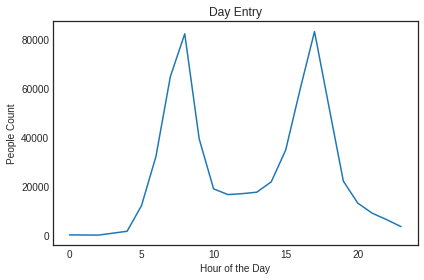

In [ ]:
plt.plot(entry_hist)
plt.title('Day Entry')
plt.xlabel('Hour of the Day')
plt.ylabel('People Count')
plt.tight_layout()
plt.show()

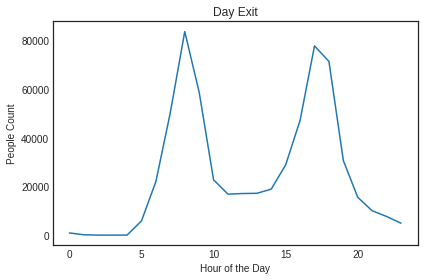

In [ ]:
plt.plot(exit_hist)
plt.title('Day Exit')
plt.xlabel('Hour of the Day')
plt.ylabel('People Count')
plt.tight_layout()
plt.show()

In [ ]:
# fig, ax = plt.subplots(24, 2, figsize =(10, 7), tight_layout = True)
# fig, ax = plt.subplots(figsize =(10, 7), tight_layout = True)
# ax.hist(entry_hist, bins=25)
# plt.show()

(array([1.0200e+02, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.5780e+03,
        1.2053e+04, 3.2122e+04, 6.4811e+04, 8.2355e+04, 3.9404e+04,
        1.8926e+04, 1.6583e+04, 0.0000e+00, 1.6975e+04, 1.7566e+04,
        2.1807e+04, 3.4789e+04, 5.9608e+04, 8.3265e+04, 5.2577e+04,
        2.2082e+04, 1.3088e+04, 8.9760e+03, 6.3360e+03, 3.4780e+03]),
 array([ 0.  ,  0.92,  1.84,  2.76,  3.68,  4.6 ,  5.52,  6.44,  7.36,
         8.28,  9.2 , 10.12, 11.04, 11.96, 12.88, 13.8 , 14.72, 15.64,
        16.56, 17.48, 18.4 , 19.32, 20.24, 21.16, 22.08, 23.  ]),
 <a list of 1 Patch objects>)

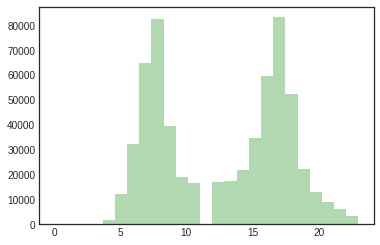

In [ ]:
plt.hist(entry_hist.index, bins=25, weights=entry_hist.CUST_COUNT, alpha=0.3,
         histtype='stepfilled', color='green')

(array([9.0300e+02, 1.3800e+02, 1.0000e+00, 1.0000e+00, 9.0000e+00,
        5.8350e+03, 2.2015e+04, 5.0342e+04, 8.3574e+04, 5.8700e+04,
        2.2702e+04, 1.6822e+04, 0.0000e+00, 1.7080e+04, 1.7167e+04,
        1.8889e+04, 2.8853e+04, 4.7132e+04, 7.7708e+04, 7.1311e+04,
        3.0618e+04, 1.5518e+04, 9.9940e+03, 7.6570e+03, 4.8920e+03]),
 array([ 0.  ,  0.92,  1.84,  2.76,  3.68,  4.6 ,  5.52,  6.44,  7.36,
         8.28,  9.2 , 10.12, 11.04, 11.96, 12.88, 13.8 , 14.72, 15.64,
        16.56, 17.48, 18.4 , 19.32, 20.24, 21.16, 22.08, 23.  ]),
 <a list of 1 Patch objects>)

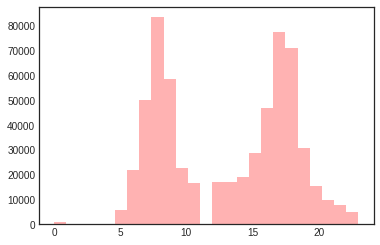

In [ ]:
plt.hist(exit_hist.index, bins=25, weights=exit_hist.CUST_COUNT, alpha=0.3,
         histtype='stepfilled', color='red')

Text(0, 0.5, 'People Count')

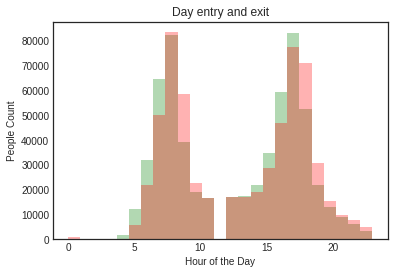

In [ ]:
# Combined Plot

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=25)


plt.hist(entry_hist.index, weights=entry_hist.CUST_COUNT, color='green', **kwargs)
plt.hist(exit_hist.index, weights=exit_hist.CUST_COUNT, color='red', **kwargs)
plt.title('Day entry and exit')
plt.xlabel('Hour of the Day')
plt.ylabel('People Count')